<a href="https://colab.research.google.com/github/SimpleAssociate/Real_Estate_Data/blob/master/Real_Estate_Trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

251782.04663066723


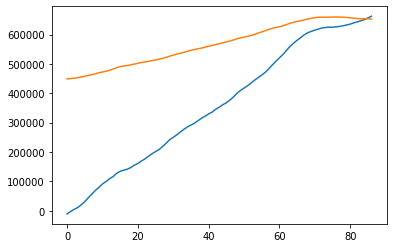

In [26]:
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import Activation 
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np 
import math 
from matplotlib import pyplot as plt

scaler = MinMaxScaler(feature_range = (0,1))

model = Sequential()
model.add(LSTM(32))
model.add(Dense(1))
model.add(Activation('linear'))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

All_Homes = pd.read_csv("/content/City_Zhvi_AllHomes.csv")

def getdataset(dataset, step):
    X, Y = [], []
    for i in range(len(dataset) - step - 1):
        a = dataset[i:(i+step), 0]
        X.append(a)
        Y.append(dataset[i+step, 0])


    return np.array(X), np.array(Y)


Area = All_Homes['Metro']
Area = Area[:13]

Price_Data = All_Homes[:13]


NewYork = Price_Data.iloc[0]
NY_Price = np.ravel(NewYork[9:,])

length = len(NY_Price)
trainsize = int(.7*length)
testsize = 1-trainsize

testset_full = []
for i in range(1,length):
    testset_full.append(NY_Price[i])
testset_full.append(0) #bogus value for filler

trainset = testset_full[:trainsize]
testset = testset_full[trainsize:]


NYtrain = NY_Price[:trainsize]
NYtest = NY_Price[trainsize:]

LosAngeles = Price_Data.iloc[1]
LA_Price = np.ravel(LosAngeles[9:,])

LAtrain = LA_Price[:trainsize]
LAtest = LA_Price[trainsize:]

Houston = Price_Data.iloc[2]
Houston_Price = np.ravel(Houston[9:,])

Houstontrain = Houston_Price[:trainsize]
Houstontest = Houston_Price[trainsize:]

Chicago = Price_Data.iloc[3]
Chicago_Price = np.ravel(Chicago[9:,])

Chicagotrain = Chicago_Price[:trainsize]
Chicagotest = Chicago_Price[trainsize:]

SanAntonio = Price_Data.iloc[4]
SanAntonio_Price = np.ravel(SanAntonio[9:,])

SAtrain = SanAntonio_Price[:trainsize]
SAtest = SanAntonio_Price[trainsize:]

Philadelphia = Price_Data.iloc[5]
Philadelphia_Price = np.ravel(Philadelphia[9:,])

PHAtrain = Philadelphia_Price[:trainsize]
PHAtest = Philadelphia_Price[trainsize:]

Phoenix = Price_Data.iloc[6]
Phoenix_Price = np.ravel(Phoenix[9:,])

PHtrain = Phoenix_Price[:trainsize]
PHtest = Phoenix_Price[trainsize:]

LasVegas = Price_Data.iloc[7]
LasVegas_Price = np.ravel(LasVegas[9:,])

LVtrain = LasVegas_Price[:trainsize]
LVtest = LasVegas_Price[trainsize:]

SanDiego = Price_Data.iloc[8]
SanDiego_Price = np.ravel(SanDiego[9:,])

SDtrain = SanDiego_Price[:trainsize]
SDtest = SanDiego_Price[trainsize:]

Dallas = Price_Data.iloc[9]
Dallas_Price = np.ravel(Dallas[9:,])

DTXtrain = Dallas_Price[:trainsize]
DTXtest = Dallas_Price[trainsize:]

Austin = Price_Data.iloc[10]
Austin_Price = np.ravel(Austin[9:,])

ATXtrain = Austin_Price[:trainsize]
ATXtest = Austin_Price[trainsize:]

SanJose = Price_Data.iloc[11]
SanJose_Price = np.ravel(SanJose[9:,])

SJtrain = SanJose_Price[:trainsize]
SJtest = SanJose_Price[trainsize:]

Jacksonville = Price_Data.iloc[12]
Jacksonville_Price = np.ravel(Jacksonville[9:,])

FLtrain = Jacksonville_Price[:trainsize]
FLtest = Jacksonville_Price[trainsize:]


#print(len(FLtrain))
#print(len(NYtrain))
#print(len(trainset))
#print(len(LAtrain))
#print(len(Houstontrain))
#print(len(Chicagotrain))
#print(len(SAtrain))
#print(len(PHAtrain))
#print(len(PHtrain))
#print(len(LVtrain))
#print(len(SDtrain))
#print(len(DTXtrain))
#print(len(ATXtrain))
#print(len(SJtrain))



train = pd.DataFrame({

    'NY' : NYtrain,
    'LA' : LAtrain,
    'H'  : Houstontrain,
    'Chicago' : Chicagotrain,
    'SA' : SAtrain,
    'PHA' : PHAtrain,
    'PH' : PHtrain,
    'LV' : LVtrain,
    'SD' : SDtrain,
    'DTX' : DTXtrain,
    'ATX' : ATXtrain,
    'SJ' : SJtrain,
    'FL' : FLtrain, 

    'trainset' : trainset

})


test = pd.DataFrame({

    'NY' : NYtest,
    'LA' : LAtest,
    'H'  : Houstontest,
    'Chicago' : Chicagotest,
    'SA' : SAtest,
    'PHA' : PHAtest,
    'PH' : PHtest,
    'LV' : LVtest,
    'SD' : SDtest,
    'DTX' : DTXtest,
    'ATX' : ATXtest,
    'SJ' : SJtest,
    'FL' : FLtest, 

    'testset' : testset
    
})

train_arr = train[['NY', 'LA', 'H', 'Chicago', 'SA', 'PHA', 'PH', 'LV', 'SD', 'DTX', 'ATX', 'SJ', 'FL', 'trainset']]
test_arr = test[['NY', 'LA', 'H', 'Chicago', 'SA', 'PHA', 'PH', 'LV', 'SD', 'DTX', 'ATX', 'SJ', 'FL', 'testset']]

train_arr_scaled = scaler.fit_transform(train_arr)
test_arr_scaled = scaler.fit_transform(test_arr)

X_train = train_arr_scaled[:,:-1]
X_test = test_arr_scaled[:,:-1]

X_train = np.asarray(X_train)
X_test = np.asarray(X_test)

Y_train = train_arr_scaled[:,-1:]
Y_test = test_arr_scaled[:,-1:]

Y_train = np.asarray(Y_train)
Y_train = np.ravel(Y_train)
Y_test = np.asarray(Y_test)
Y_test = np.ravel(Y_test)

X_train_reshaped = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1] ))
X_test_reshaped = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

model.fit(X_train_reshaped, Y_train, epochs = 5, batch_size = 1, verbose = 0)
scaled_predictions = model.predict(X_test_reshaped)

scaled_predictions = np.ravel(scaled_predictions) 
scaled_predictions = np.reshape(scaled_predictions, (testsize + 1,1)) 
uniform_data_scaled = np.concatenate((X_test, scaled_predictions), axis =1)
uniform_data = scaler.inverse_transform(uniform_data_scaled)
predictions = uniform_data[:,-1:]
predictions = np.ravel(predictions)



'''''
TestX = FullData[:trainsize]
TestY = FullData[trainsize:]

FullData = np.reshape(FullData, (len(FullData), 1))
DataScaled = scaler.fit_transform(FullData)



NY_Price = np.reshape(NY_Price, (len(NY_Price), 1))
NY_scaled = scaler.fit_transform(NY_Price)

NY_trainclose, NY_testclose = NY_scaled[0:trainsize,:], NY_scaled[trainsize:,]
NY_trainx, NY_trainy = getdataset(NY_trainclose, 1)
NY_testx, NY_testy = getdataset(NY_testclose,1)
NY_trainx = np.reshape(NY_trainx, (NY_trainx.shape[0], 1, NY_trainx.shape[1]))
NY_testx = np.reshape(NY_testx, (NY_testx.shape[0], 1, NY_testx.shape[1]))
model.fit(NY_trainx, NY_trainy, epochs = 5, batch_size = 1, verbose = 0)

predicts = model.predict(NY_testx)
predicts = scaler.inverse_transform(predicts)
actuals = scaler.inverse_transform([NY_testy])

predicts = predicts.reshape(1, testsize - 2)
predicts = np.ravel(predicts)
actuals = np.ravel(actuals)

print(mean_squared_error(actuals,predicts, squared = False))
plt.plot(predicts)
plt.plot(actuals)
plt.show()

'''''

actuals = testset[:-1]
predictions = predictions[:-1]
plt.plot(predictions)
plt.plot(actuals)
print(mean_squared_error(actuals,predictions, squared = False))

plt.show()

